## Customer Segments

In [85]:
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set()

In [86]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [87]:
prior = pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [88]:
train = pd.read_csv('order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [89]:
# comment this if execute it on local machine
prior = prior[0:300000]

In [90]:
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
221645,23391,13198,1,1,7,prior,17,0,10,28.0
221646,23391,42803,2,1,7,prior,17,0,10,28.0
221647,23391,8277,3,1,7,prior,17,0,10,28.0
221648,23391,37602,4,1,7,prior,17,0,10,28.0
221649,23391,40852,5,1,7,prior,17,0,10,28.0


In [91]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [92]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [93]:
print(aisles.shape)

(134, 2)


In [94]:
_mt = pd.merge(prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [95]:
mt['product_name'].value_counts()[0:10]

Banana                    4432
Bag of Organic Bananas    3563
Organic Strawberries      2370
Organic Baby Spinach      2242
Organic Hass Avocado      1985
Organic Avocado           1626
Large Lemon               1380
Strawberries              1343
Organic Raspberries       1293
Limes                     1270
Name: product_name, dtype: int64

In [96]:
len(mt['product_name'].unique())

24836

In [97]:
prior.shape

(300000, 4)

## Clustering Customers
#### We are dealing with 134 types of product (aisle).

In [110]:
len(mt['aisle'].unique())

134

In [111]:
mt['aisle'].value_counts()[0:10]

fresh fruits                     33755
fresh vegetables                 31004
packaged vegetables fruits       16319
yogurt                           13477
packaged cheese                   9133
milk                              8254
water seltzer sparkling water     7634
chips pretzels                    6581
soy lactosefree                   5965
bread                             5457
Name: aisle, dtype: int64

I want to find a possible clusters among the different customers and substitute single user_id with the cluster to which they are assumed to belong. Hope this would eventually increase the next prediction model performance.

Ths first thing to do is creating a dataframe with all the purchases made by each user

In [112]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [113]:
cust_prod.shape

(25831, 134)

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
ps = scaler.fit_transform(cust_prod)

In [122]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(ps)
pca_samples = pca.transform(ps)

In [123]:
# add (n_components = ?) to pca
# pca.explained_variance_ratio_.sum()

In [124]:
pca_df = pd.DataFrame(pca_samples)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,0.146072,-0.339755,0.974064,0.517126,-0.045041,0.978477,-0.043010,1.614745,-0.981094,0.293645,...,-0.685411,-0.644070,0.158459,0.076092,0.124770,-0.560575,0.470633,-0.699415,0.872473,-0.920527
1,-0.955107,-1.055062,-0.849178,-0.058276,0.315154,-0.693160,-0.819953,-0.263930,-0.632592,-0.242025,...,0.394682,-0.020748,0.882479,0.168917,-0.030025,-0.466642,0.142179,0.091819,0.466027,-0.355808
2,-0.876677,1.177773,-0.923778,1.926836,-1.021267,1.991685,1.176926,0.936627,-1.168087,-1.016570,...,-0.312459,0.552565,2.120486,0.118013,1.317353,-0.342499,-0.355705,0.381291,1.054068,0.291589
3,-0.755777,4.196247,1.180699,0.732668,0.555319,-2.027749,-0.315472,2.451286,-2.102857,1.082682,...,0.385930,0.013902,0.960118,1.705728,1.417657,-0.518297,0.049466,-1.397800,0.409280,0.526941
4,-2.385310,0.559617,0.304754,-0.300860,1.734285,-0.017856,0.082073,-0.215153,0.285198,0.275897,...,-0.104058,0.160441,-0.471832,-0.218837,-0.052960,0.163712,-0.483453,-0.324844,0.022376,-0.024478


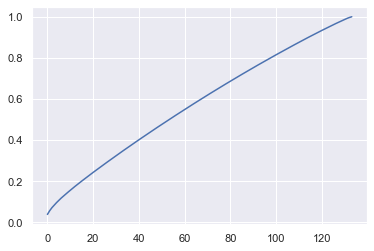

In [125]:
# After PCA looking @ data in diff orientation, all components important, PCA may not be nec or suitable to perform analysis
# Can't reduce dimension w/o chopping off a bunch of data

plt.plot(range(pca.n_components_), pca.explained_variance_ratio_.cumsum())

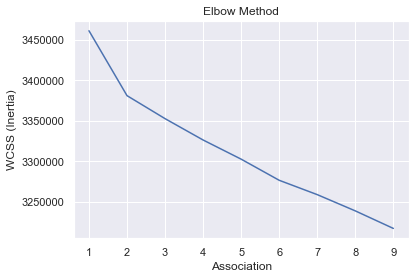

In [126]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

max_k = 10

wcss = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
        max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(ps)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, max_k), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS (Inertia)') #within cluster sum of squares
plt.show()

In [127]:
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, 
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score: 0.271, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.13, Change from Previous Cluster: -0.141
No. Clusters: 4, Silhouette Score: 0.127, Change from Previous Cluster: -0.003
No. Clusters: 5, Silhouette Score: 0.13, Change from Previous Cluster: 0.003
No. Clusters: 6, Silhouette Score: 0.122, Change from Previous Cluster: -0.008
No. Clusters: 7, Silhouette Score: 0.118, Change from Previous Cluster: -0.004
No. Clusters: 8, Silhouette Score: 0.112, Change from Previous Cluster: -0.006
No. Clusters: 9, Silhouette Score: 0.116, Change from Previous Cluster: 0.004


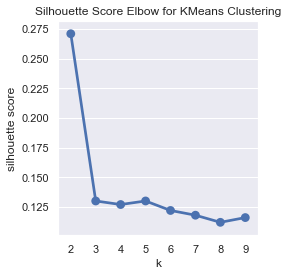

In [128]:
optimal_kmeans(ps, start=2, end=max_k)

In [129]:
from sklearn.cluster import KMeans

optimum_k = 6

clusterer = KMeans(n_clusters = optimum_k)
clusterer.fit(ps)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(ps)

In [130]:
c_preds

array([4, 4, 4, ..., 4, 4, 1], dtype=int32)

In [131]:
# ps.values[c_preds == 0,0]

array([-1.17613456e+00,  3.72207076e-01,  2.00426682e+00, -1.48201908e+00,
        8.02509241e-01, -1.14809224e+00,  3.61999323e+00,  2.69526466e+00,
        1.26800527e+00,  1.57559998e+00, -1.21437750e-01,  2.11707969e+00,
       -1.81683284e+00, -2.00870429e+00,  1.36155827e+00,  1.05660130e+00,
        1.72341435e+00,  6.94988320e-01, -2.24954598e+00, -1.10476499e+00,
        4.32363995e+00,  7.45332436e-01, -2.68002180e-01,  3.43482384e-01,
       -1.78015227e+00,  2.08699835e-01,  2.89977619e+00, -2.56596713e+00,
        1.51664366e+00,  1.24235908e-01,  1.94080020e+00, -6.64095732e-02,
       -1.45116887e-02,  3.37254383e+00, -1.51219223e+00, -1.90848037e+00,
        2.99447943e+00,  2.26402381e-01,  5.24607160e-01, -3.91649610e-01,
        4.10225606e+00, -2.19776659e+00,  2.19797816e+00,  1.71003447e-01,
        6.67811852e-02,  1.68899592e+00, -1.61316262e+00, -2.16777961e-01,
       -1.36008037e+00,  4.83103124e+00,  1.99345456e+00,  1.44797217e+00,
       -3.30552294e-01,  

In [132]:
ps2 = ps.values

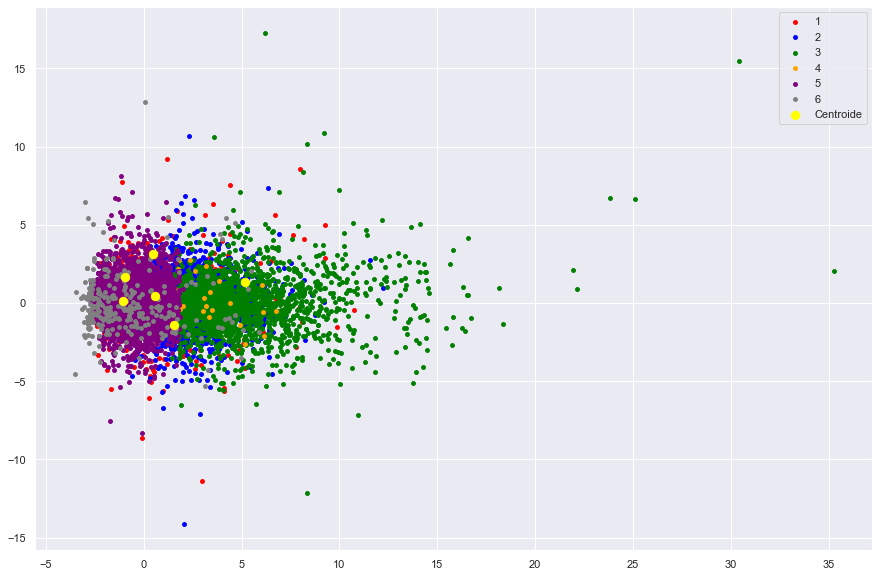

In [138]:
col1, col2 = 0, 33

plt.figure(num=None, figsize=(15,10))

#Visualising the clusters
plt.scatter(ps2[c_preds == 0, col1], ps2[c_preds == 0, col2], s = 15, 
            c = 'red', label = '1')
plt.scatter(ps2[c_preds == 1, col1], ps2[c_preds == 1, col2], s = 15, 
            c = 'blue', label = '2')
plt.scatter(ps2[c_preds == 2, col1], ps2[c_preds == 2, col2], s = 15, 
            c = 'green', label = '3')
plt.scatter(ps2[c_preds == 3, col1], ps2[c_preds == 3, col2], s = 15, 
            c = 'orange', label = '4')
plt.scatter(ps2[c_preds == 4, col1], ps2[c_preds == 4, col2], s = 15, 
            c = 'purple', label = '5')
plt.scatter(ps2[c_preds == 5, col1], ps2[c_preds == 5, col2], s = 15, 
            c = 'grey', label = '6')
#Plotting the centroids of the clusters
plt.scatter(clusterer.cluster_centers_[:, 0], 
            clusterer.cluster_centers_[:,1], s = 70, 
            c = 'yellow', label = 'Centroide')

plt.legend()

In [139]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize

dbsc = DBSCAN(eps=0.05, min_samples=10)
dbsc.fit(ps)
pred_classes = dbsc.labels_

In [140]:
pred_classes

array([-1, -1, -1, ..., -1, -1, -1])

In [153]:
from sklearn.cluster import DBSCAN

epss = np.arange(0.5,1,.05) # maxed out at .95 rn
min_sampless = range(30,40, 5) 
# maybe reduce min samples, and increase eps closer to 1, in order to reduce outlier points. 
# high eps makes sense since Rank(data) is high due to number of cols
# so higher eps is required for DBSCAN to find neighbours. 
# try min samples around the 10-15 range
# try eps around 0.85-0.975 range
 
for eps in epss:
    for min_samples in min_sampless:
        # print(f"eps {eps} min samples {min_samples}")
        # print("eps {} min samples {}".format(eps,min_samples)) # if your Python does not support f-strings
        db = DBSCAN(eps=eps, metric="euclidean", min_samples=min_samples)
        db.fit_predict(ps)
        labels = db.labels_
        # # only print results with 3 classes or more
        # if (len(set(labels)) - (1 if -1 in labels else 0)) == 3:
        #     print("With epsilon =", round(eps,3), "and min_samples =", min_samples, "we have",len(set(db.labels_))-1, "classes and 1 outlier class. There are", list(labels).count(-1), "outlier points.") 
        print("With epsilon =", round(eps,3), "and min_samples =", min_samples, "we have",len(set(db.labels_))-1, "classes and 1 outlier class. There are", list(labels).count(-1), "outlier points.") 


With epsilon = 0.5 and min_samples = 30 we have 9 classes and 1 outlier class. There are 25311 outlier points.

With epsilon = 0.5 and min_samples = 35 we have 8 classes and 1 outlier class. There are 25345 outlier points.

With epsilon = 0.55 and min_samples = 30 we have 10 classes and 1 outlier class. There are 25173 outlier points.

With epsilon = 0.55 and min_samples = 35 we have 9 classes and 1 outlier class. There are 25205 outlier points.

With epsilon = 0.6 and min_samples = 30 we have 10 classes and 1 outlier class. There are 24944 outlier points.

With epsilon = 0.6 and min_samples = 35 we have 7 classes and 1 outlier class. There are 25061 outlier points.

With epsilon = 0.65 and min_samples = 30 we have 10 classes and 1 outlier class. There are 24944 outlier points.

With epsilon = 0.65 and min_samples = 35 we have 7 classes and 1 outlier class. There are 25061 outlier points.

With epsilon = 0.7 and min_samples = 30 we have 10 classes and 1 outlier class. There are 24944 o

In [152]:
import time
t_start = time.clock()
# optimal solution from grid search
optimal_eps = .6
optimal_min_samples= 11
        
db = DBSCAN(eps=optimal_eps, metric="euclidean", min_samples=optimal_min_samples)
db.fit_predict(ps)
print("\nFinal result: \n")
print("With epsilon =", round(optimal_eps,3), "and min_samples =", optimal_min_samples, "we have",len(set(db.labels_))-1, "classes and 1 outlier class. There are", list(labels).count(-1), "outlier points.\n") 
t_end = time.clock()
print(f"Time cost (min): {(t_end - t_start)/60}")


Final result: 

With epsilon = 0.6 and min_samples = 11 we have 49 classes and 1 outlier class. There are 24955 outlier points.

Time cost (min): 0.7435536833333345


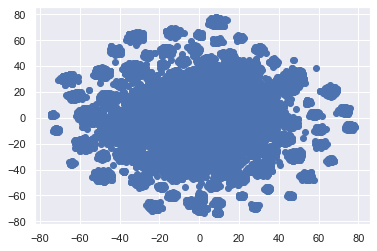

In [148]:
# t-SNE

from sklearn.manifold import TSNE

# model = TSNE(learning_rate=200)
model = TSNE(perplexity=100, learning_rate=300)
transformed = model.fit_transform(ps)
xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys)

['blue', 'blue', 'purple', 'purple', 'blue', 'orange', 'blue', 'purple', 'blue', 'orange']


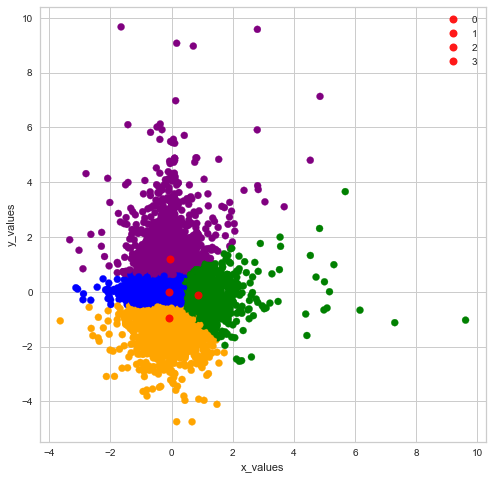

In [154]:
# import matplotlib
# fig = plt.figure(figsize=(8,8))
# colors = ['orange','blue','purple','green']
# colored = [colors[k] for k in c_preds]
# print (colored[0:10])
# plt.scatter(tocluster[cluster_a],tocluster[cluster_b],  color = colored)
# for ci,c in enumerate(centers):
#     plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

# plt.xlabel('x_values')
# plt.ylabel('y_values')
# plt.legend()
# plt.show()

In [90]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds #KMeans

clust_prod

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,2
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,4,2
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,2
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
206201,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
206206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


(25831, 135)


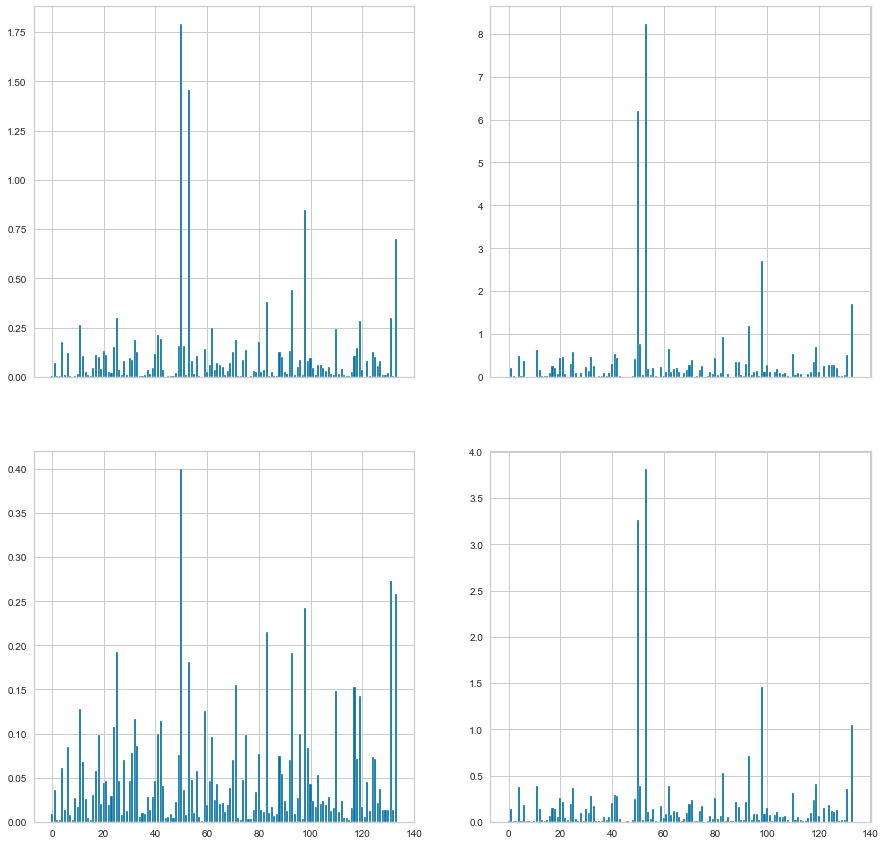

In [91]:
# assume KMeans 6 clusters
# visualise how customers in the siz clusters differ in shopping aisles
print (clust_prod.shape)
f,arr = plt.subplots(2,3,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[0,2].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
c4 = clust_prod[clust_prod['cluster']==4].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c4)
c5 = clust_prod[clust_prod['cluster']==5].drop('cluster',axis=1).mean()
arr[1,2].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c5)

plt.show()

In [92]:
c0.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     1.790051
fresh vegetables                 1.453976
packaged vegetables fruits       0.846194
yogurt                           0.701005
packaged cheese                  0.440397
milk                             0.379292
chips pretzels                   0.299386
water seltzer sparkling water    0.298603
soy lactosefree                  0.283327
bread                            0.263220
dtype: float64

In [93]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh vegetables              8.224453
fresh fruits                  6.189781
packaged vegetables fruits    2.711679
yogurt                        1.698905
packaged cheese               1.198905
milk                          0.925182
fresh herbs                   0.760949
soy lactosefree               0.708029
frozen produce                0.651460
bread                         0.620438
dtype: float64

In [94]:
c2.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     0.400112
water seltzer sparkling water    0.272485
yogurt                           0.258406
packaged vegetables fruits       0.242575
milk                             0.215537
chips pretzels                   0.192071
packaged cheese                  0.191300
fresh vegetables                 0.180723
ice cream ice                    0.154735
soft drinks                      0.152634
dtype: float64

In [99]:
c3.sort_values(ascending=False)[0:10]

aisle
fresh vegetables              3.817503
fresh fruits                  3.267921
packaged vegetables fruits    1.460275
yogurt                        1.041816
packaged cheese               0.708483
milk                          0.527180
soy lactosefree               0.408901
frozen produce                0.387395
bread                         0.383214
fresh herbs                   0.382616
dtype: float64

In [ ]:
c4.sort_values(ascending=False)[0:10]

In [ ]:
c5.sort_values(ascending=False)[0:10]

In [96]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,1.790051,1.453976,0.846194,0.701005,0.440397,0.379292,0.298603,0.299386
1,6.189781,8.224453,2.711679,1.698905,1.198905,0.925182,0.521898,0.585766
2,0.400112,0.180723,0.242575,0.258406,0.191300,0.215537,0.272485,0.192071
3,3.267921,3.817503,1.460275,1.041816,0.708483,0.527180,0.349761,0.365890


In [97]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,28.830382,23.417588,13.628717,11.290323,7.092989,6.108845,4.809269,4.821887
1,28.063208,37.287995,12.294200,7.702490,5.435592,4.194589,2.366179,2.655746
2,20.484866,9.252618,12.419309,13.229809,9.794147,11.035002,13.950653,9.833596
3,28.321081,33.083972,12.655312,9.028784,6.139988,4.568751,3.031166,3.170946


I think another interesting information my come by lookig at the 10th to 15th most bought products for each cluster which will not include the generic products (i.e. vegetables, fruits, water, etc.) bought by anyone.

In [98]:
c0.sort_values(ascending=False)[10:15]

aisle
frozen produce         0.246769
refrigerated           0.243113
eggs                   0.211124
energy granola bars    0.193106
crackers               0.188667
dtype: float64

In [60]:
c1.sort_values(ascending=False)[10:15]

aisle
soy lactosefree    13.437227
bread              11.515146
crackers           10.998149
cereal              9.971054
candy chocolate     9.347526
dtype: float64

In [61]:
c2.sort_values(ascending=False)[10:15]

aisle
eggs                        6.176555
canned jarred vegetables    6.099542
bread                       6.015169
chips pretzels              5.795979
refrigerated                5.281124
dtype: float64

In [62]:
c3.sort_values(ascending=False)[10:15]

aisle
soy lactosefree                  11.003254
frozen produce                   10.577007
water seltzer sparkling water    10.527657
refrigerated                      8.530369
eggs                              8.318330
dtype: float64

As you can note by taking into account more products clusters start to differ significantly. I hope this informtion will be useful in the next prediction task.

In [ ]:
c4.sort_values(ascending=False)[10:15]

In [ ]:
c5.sort_values(ascending=False)[10:15]

## Ignore this stuff

In [ ]:
def standardize(df):
    '''
    Uses sklearn.preprocessing.StandardScaler to make each features look like
    a Gaussian with zero mean and unit variance.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    
    Returns
    -------
    A numpy array.
    '''
    
    # YOUR CODE HERE
    scaled = StandardScaler().fit(df).transform(df)
    
    
    return scaled

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
feat_dt_scaled = scaler.fit_transform(tocluster)
feat_dt_scaled = pd.DataFrame(feat_dt_scaled)

In [ ]:
def kmeans(df, clusters_number):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        end : int. Ending range of kmeans to test.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''   
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(df)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = df.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], 
                    hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new, cluster_labels

In [ ]:
kmeans(feat_dt_scaled, 4)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 120))

visualizer.fit(std_data)   
visualizer.show()

In [ ]:
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

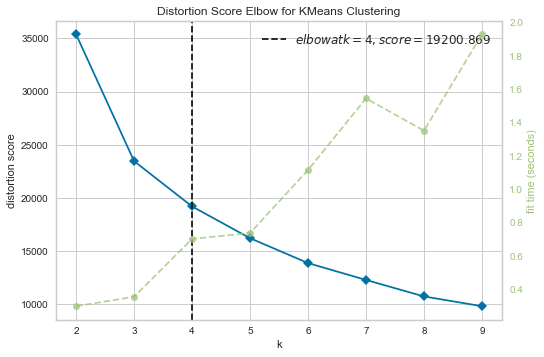

In [127]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(feat_dt_scaled)   
visualizer.show()

In [130]:
def kmeans(df, clusters_number):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        end : int. Ending range of kmeans to test.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''   
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(df)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = df.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], 
                    hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new, cluster_labels

(              0         1  Cluster
 0     -0.888873 -0.124193        0
 1     -0.342703 -0.855902        3
 2      1.029097 -0.507174        1
 3     -0.229756 -0.622145        3
 4      0.050158 -0.898403        3
 ...         ...       ...      ...
 25826 -0.889111  1.728272        0
 25827 -0.366600 -0.341522        3
 25828 -0.507030 -0.851747        3
 25829 -0.672238 -0.080227        0
 25830 -1.985170  0.515166        0
 
 [25831 rows x 3 columns], array([0, 3, 1, ..., 3, 0, 0], dtype=int32))

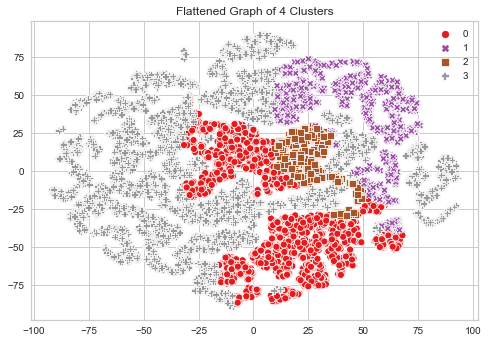

In [131]:
kmeans(feat_dt_scaled, 4)

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal

In [45]:
 def fit_pca(df, n_components):
    '''
    Uses sklearn.decomposition.PCA to fit a PCA model on "df".
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from delta.csv.
    n_components: An int. Number of principal components to keep.
    
    Returns
    -------
    An sklearn.decomposition.pca.PCA instance.
    '''
    
    # YOUR CODE HERE
    pca = PCA(n_components=n_components).fit(df)
    
    return pca

In [46]:
pca_naive = fit_pca(cust_prod, n_components=cust_prod.shape[1])

In [47]:
assert_is_instance(pca_naive, PCA)
assert_almost_equal(pca_naive.explained_variance_ratio_.sum(), 1.0, 3)
assert_equal(pca_naive.n_components_, cust_prod.shape[1])
assert_equal(pca_naive.whiten, False)

In [124]:
def standardize(df):
    '''
    Uses sklearn.preprocessing.StandardScaler to make each features look like
    a Gaussian with zero mean and unit variance.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    
    Returns
    -------
    A numpy array.
    '''
    
    # YOUR CODE HERE
    scaled = StandardScaler().fit(df).transform(df)
    
    
    return scaled

In [125]:
scaled = standardize(cust_prod)

In [61]:
n_components = 6
pca = fit_pca(scaled, n_components=n_components)

In [62]:
def reduce(pca, array):
    '''
    Applies the `pca` model on array.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.PCA instance.
    
    Returns
    -------
    A Numpy array
    '''
    
    # YOUR CODE HERE
    reduced = pca.fit_transform(array)

    
    return reduced

In [63]:
reduced = reduce(pca, scaled)

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from sklearn.utils import check_random_state
from sklearn.cluster import KMeans

from nose.tools import assert_equal, assert_is_instance, assert_true, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal

In [65]:
def plot_inertia(array, start=1, end=10):
    '''
    Increase the number of clusters from "start" to "end" (inclusive).
    Finds the inertia of k-means clustering for different k.
    Plots inertia as a function of the number of clusters.

    
    Parameters
    ----------
    array: A numpy array.
    start: An int. Default: 1
    end: An int. Default: 10
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    #Your code is here
    inertia = []
    
    for i in range(start, end+1):
        kmeans = KMeans(n_clusters = i, init = 'k-means++',
                        max_iter = 400, n_init = 10, random_state = 0)
        kmeans.fit(array)
        inertia.append(kmeans.inertia_)

    
    
    fig, ax = plt.subplots(figsize=(10,6))
    x_axis = range(start, end+1)
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)
    

    return ax

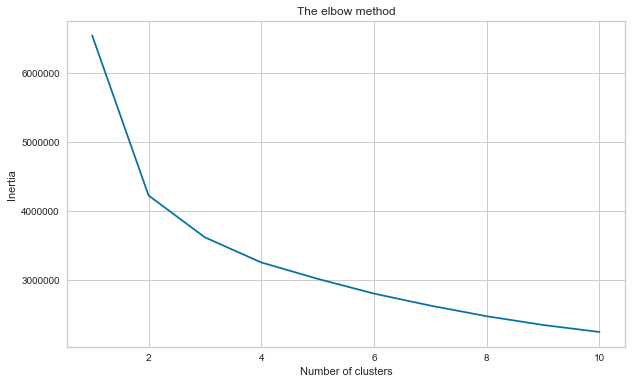

In [66]:
inertia = plot_inertia(reduced)

In [ ]:
import seaborn as sns; sns.set()